In [ ]:
import tweepy
import time
import csv
import pandas as pd


consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
limit = 2000
language = 'en' 
keywords = 'I put name starbucks -filter:retweets'
startDate = "2022-07-23"
endDate = "2022-08-04"
place = "United Kingdom"


# Passing the parameters into the Cursor constructor method
public_tweets = tweepy.Cursor( api.search,
                                q= keywords,
                                result_type='recent',
                                since = startDate,
                                until = endDate,
                                count=100,
                                include_entities=True,
                                lang=language,
                                tweet_mode="extended",
                                encoding='utf-8-sig').items(limit)

In [ ]:
tweet_id_list = []
tweet_text_list = []
tweet_location_list = []
user_screen_name_list = []
tweet_created_list = []
tweet_contributors_list = []
tweet_retweet_count_list = []
tweet_source_list = []
tweet_username_list = []


# Iterating through the results to extract the results
for tweet in public_tweets:
    tweet_id_list.append(tweet.id)
    tweet_text_list.append(tweet.full_text)
    tweet_location_list.append(tweet.user.location)
    user_screen_name_list.append(tweet.user.screen_name)
    tweet_source_list.append(tweet.source)
    tweet_created_list.append(tweet.created_at)
    tweet_contributors_list.append(tweet.id_str)
    tweet_retweet_count_list.append(tweet.retweet_count)
    tweet_username_list.append(tweet.user.name)

# Creating a Pandas dataframe to organize the data into a table
df = pd.DataFrame({
    'tweet_id': tweet_id_list,
    'tweet_text': tweet_text_list,
    'tweet_location': tweet_location_list,
    'user_screen': user_screen_name_list,
    'tweet_source': tweet_source_list,
    'tweet_created': tweet_created_list,
    'tweet_contributors': tweet_contributors_list,
    'tweet_retweet_count': tweet_retweet_count_list,
    'tweet_username': tweet_username_list})

In [ ]:
df.to_csv('starbuck.csv', sep=',', index=False, encoding='utf-8-sig')

# Saving the file to Google drive

file_name = "starbuck.csv"

In [ ]:
data =pd.read_csv("starbuck.csv")

In [ ]:
data.shape

(728, 9)

In [ ]:
data.tail(10)

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username
718,1552712270605582340,YALL! So i put 'french' as my name in Starbuck...,anywhere but france,frenchhatepage,Twitter for iPhone,2022-07-28 17:47:07,1552712270605582340,6,french hate page
719,1552682649390649346,YALL! So i put 'Anontwt' as my name in Starbuc...,he/it 16 I LOVE CLUSS!!!!!,chefmenu63,Twitter for iPhone,2022-07-28 15:49:25,1552682649390649346,5,menu
720,1552681997931347970,I came home from target and noticed that the b...,"Orland Park, IL",MsJachymiak,Twitter for iPhone,2022-07-28 15:46:50,1552681997931347970,0,Ms. Jachymiak
721,1552463495337328646,GUYS!!!! So I put “Shakespeare” as my name in ...,NaN,WhenImKissinU_,Twitter for iPhone,2022-07-28 01:18:35,1552463495337328646,1,Itslikelectrity
722,1552451160434683904,GUYS!!!! So I put “Honey” as my name in Starbu...,The rooftop that rainy night…,4everiah,Twitter for iPhone,2022-07-28 00:29:34,1552451160434683904,1,Matt🦋🌷 #BritneyIsComing
723,1552398020892917762,OMFG so I put this in as my name at Starbucks ...,They She 14,janehopz,Twitter for iPhone,2022-07-27 20:58:24,1552398020892917762,0,‏َ
724,1552289054242312193,starbucks employee: and what’s your name?\n\nm...,25. he / they,1stdiscipIe,Twitter for iPhone,2022-07-27 13:45:25,1552289054242312193,0,jo/chase
725,1552177295779016704,This was supposed to be Evelynn- and no my nam...,She/Her - bisexual,JustKaboodle,Twitter for iPhone,2022-07-27 06:21:20,1552177295779016704,0,Kaboodle 🐰| #KaboodleSMP
726,1552104468753309697,Take a wild guess 🤣🤣🤣\n\nI can’t believe peopl...,Elysian Fields,BuckStarsky22,Twitter for iPhone,2022-07-27 01:31:56,1552104468753309697,0,Buck Starsky
727,1552018777184899073,i put c!sunshipduo as my starbucks name and wh...,sheher ✿,cupidIocket,Twitter for iPhone,2022-07-26 19:51:26,1552018777184899073,2,mj!


In [ ]:
data.tweet_created= pd.to_datetime(data.tweet_created).dt.date

In [ ]:
data.head(1)

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username
0,1554976318797791238,"YALL ‼️ So I put ""Morgan Hurd"" as my name in S...",NaN,karasrings_,Twitter for iPhone,2022-08-03,1554976318797791238,4,Ian (he/him)


In [ ]:
dt=data.groupby("tweet_created").size()
dt

tweet_created
2022-07-26      1
2022-07-27      4
2022-07-28      6
2022-07-30      6
2022-07-31     30
2022-08-01    235
2022-08-02    258
2022-08-03    188
dtype: int64

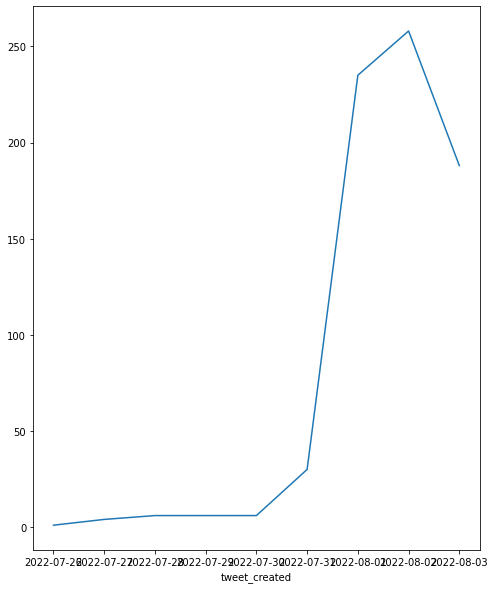

In [ ]:
import seaborn as sns
sns.lineplot(err_style="bars",
             data = dt);

#increase size
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10